In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline
filename = 'Business-Track-Application-Datasets.xlsx'

In [2]:
df = pd.read_excel(filename, sheetname='Training Data', parse_cols='B:I')
y = df['TotRevSpend']
X = df[df.columns[1:]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C7BEDF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0DB286B0>]], dtype=object)

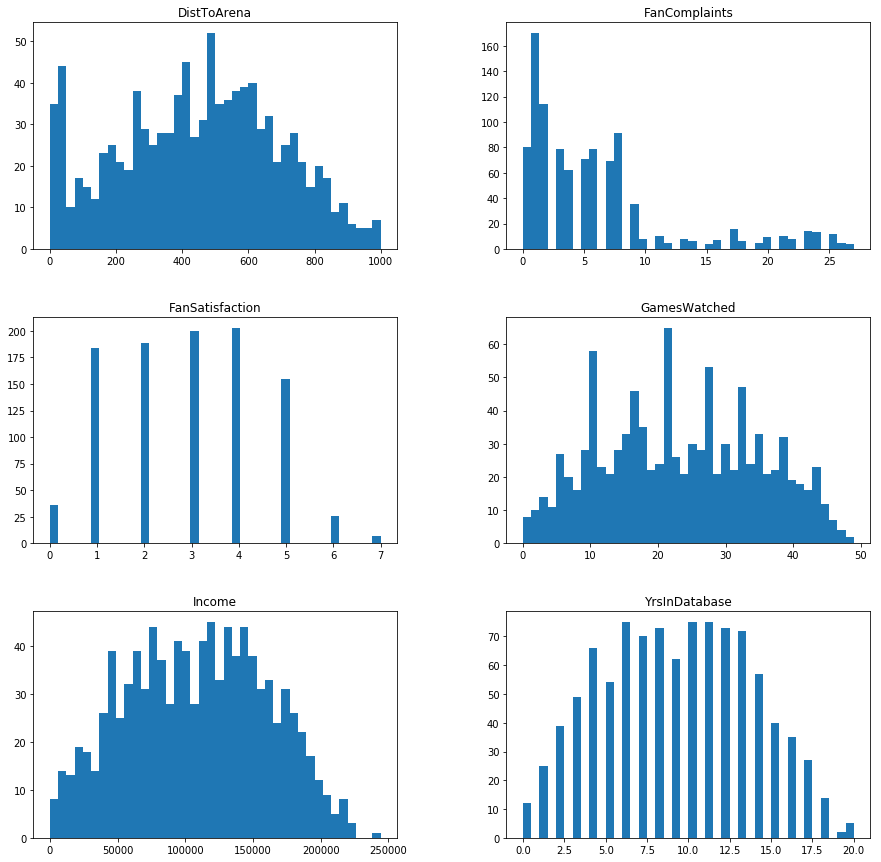

In [37]:
X.hist(grid=False, bins=40, figsize=(15, 15))

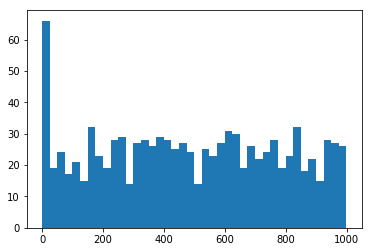

In [39]:
y.hist(grid=False, bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC02C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000121CD128>]], dtype=object)

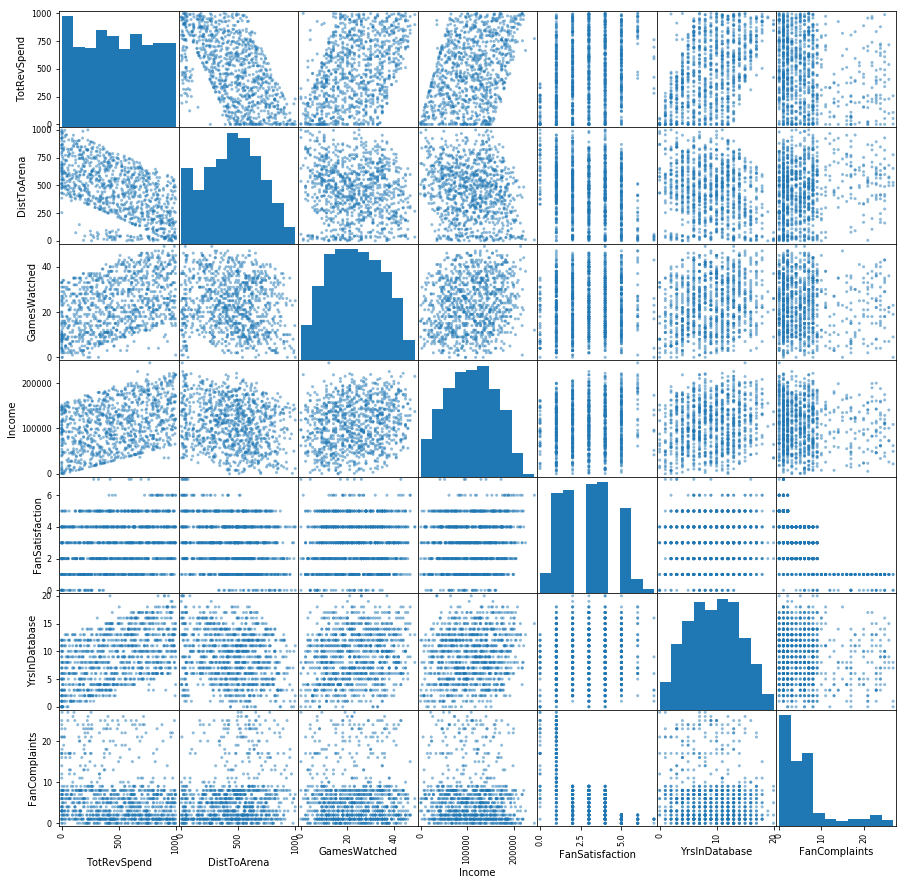

In [61]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
lasso_model = LassoCV()
lasso_model = lasso_model.fit(X_train, y_train)

In [5]:
lasso_model.score(X_train, y_train)

0.38251472659131613

In [6]:
lasso_model.score(X_test, y_test)

0.41989486065332793

In [7]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)

In [8]:
rf.score(X_train, y_train)

0.91693695047156953

In [9]:
rf.score(X_test, y_test)

0.60247637345780936

In [4]:
binary_y_train = y_train.copy()
binary_y_train[y_train>=250] = 1
binary_y_train[y_train<250] = 0

binary_y_test = y_test.copy()
binary_y_test[y_test>=250] = 1
binary_y_test[y_test<250] = 0

In [8]:
# imbalanced
y[y>=250].size / y.size

0.736

In [8]:
log = LogisticRegressionCV(class_weight='balanced') 
log = log.fit(X_train, binary_y_train)

In [9]:
bin_y_predict = log.predict_proba(X_test)[:,1]
bin_roc = roc_curve(binary_y_test, bin_y_predict, pos_label=1)

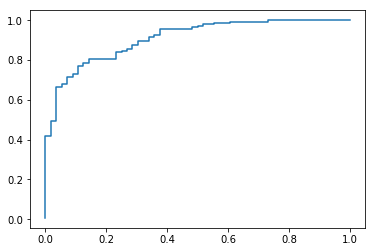

In [10]:
plt.plot(bin_roc[0], bin_roc[1])

In [11]:
roc_auc_score(binary_y_test, bin_y_predict)

0.90873015873015872

In [31]:
pd.DataFrame([binary_y_test.values, bin_y_predict]).T

,0,1
0,1.0,0.932801
1,1.0,0.374792
2,1.0,0.980475
3,1.0,0.993599
4,1.0,0.191783
5,1.0,0.722485
6,1.0,0.744801
7,1.0,0.601596
8,1.0,0.812482
9,0.0,0.217006


In [15]:
rf_bin = RandomForestClassifier(class_weight='balanced')
rf_bin = rf_bin.fit(X_train, binary_y_train)

In [16]:
bin_y_predict = rf_bin.predict_proba(X_test)[:,1]
roc_auc_score(binary_y_test, bin_y_predict)

0.84874999999999989

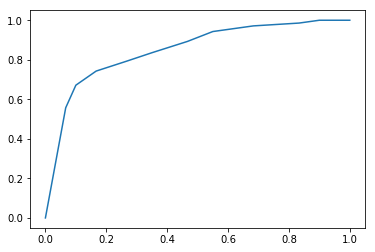

In [17]:
rf_roc = roc_curve(binary_y_test, bin_y_predict, pos_label=1)
plt.plot(rf_roc[0], rf_roc[1])

In [43]:
pd.DataFrame([binary_y_test.values, bin_y_predict]).T

,0,1
0,1.0,1.0
1,1.0,0.3
2,1.0,1.0
3,1.0,1.0
4,1.0,0.5
5,1.0,1.0
6,1.0,0.8
7,1.0,0.6
8,1.0,0.7
9,0.0,0.3


In [28]:
lasso_model.coef_

array([-0.52195053,  0.        ,  0.00166109,  0.        ,  0.        , -0.        ])

In [29]:
log.coef_

array([[ -5.43869823e-03,   6.10482236e-02,   6.40854050e-06,
          2.49332007e-02,   1.24368033e-01,  -2.99342013e-02]])

In [12]:
# Use trained model to predict
out_of_sample_X = pd.read_excel(filename, sheetname='Prediction', parse_cols='D:I')

# Use LassoCV for regression
tot_rev_spend_predicted = lasso_model.predict(out_of_sample_X)

# Use LogisticCV for classification
likelihood_over_250_predicted = np.round(log.predict_proba(out_of_sample_X)[:,1], 3)

In [13]:
# Results
result = out_of_sample_X.copy()
result['TotRevSpend'] = tot_rev_spend_predicted
result['LikelihoodOver250'] = likelihood_over_250_predicted
result

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,TotRevSpend,LikelihoodOver250
0,65.432342,17.15,112408.36,4,8.6,7,686.175311,0.885
1,866.849829,26.95,197936.46,4,13.0,4,400.009459,0.424
2,415.742495,24.01,175943.52,4,8.0,20,601.107853,0.717
3,648.024215,41.65,241922.34,4,9.8,20,581.202175,0.798
4,370.643909,1.96,151506.92,4,9.4,7,587.179474,0.523
5,95.424164,14.70,102633.72,3,12.8,20,655.608488,0.859
6,333.891485,20.09,19549.28,4,13.8,18,404.357924,0.611
7,974.441884,28.42,131957.64,6,8.0,13,243.044782,0.151
8,714.331609,38.71,73309.80,3,0.6,23,288.651750,0.248
9,793.339728,46.06,63535.16,3,10.8,20,232.576840,0.418


In [14]:
result.to_csv('prediction.csv')